In [ ]:
# Importing Data from drive
import gdown
url = 'https://drive.google.com/uc?id=1rueUc3n7KipFd7CEXrYseZUza2c71dSK'
output = 'exoplanetdata.csv'
gdown.download(url, output,quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1rueUc3n7KipFd7CEXrYseZUza2c71dSK
To: /content/exoplanetdata.csv
100%|██████████| 4.09M/4.09M [00:00<00:00, 213MB/s]


'exoplanetdata.csv'

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
dataset = pd.read_csv('exoplanetdata.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4048 entries, 0 to 4047
Columns: 112 entries, P_NAME to P_SEMI_MAJOR_AXIS_EST
dtypes: float64(94), int64(4), object(14)
memory usage: 3.5+ MB


In [ ]:
print(dataset.isnull().sum())

P_NAME                      0
P_STATUS                    0
P_MASS                   2450
P_MASS_ERROR_MIN         2581
P_MASS_ERROR_MAX         2581
                         ... 
S_CONSTELLATION_ABR         0
S_CONSTELLATION_ENG         0
P_RADIUS_EST                0
P_MASS_EST                  0
P_SEMI_MAJOR_AXIS_EST      70
Length: 112, dtype: int64


<Axes: >

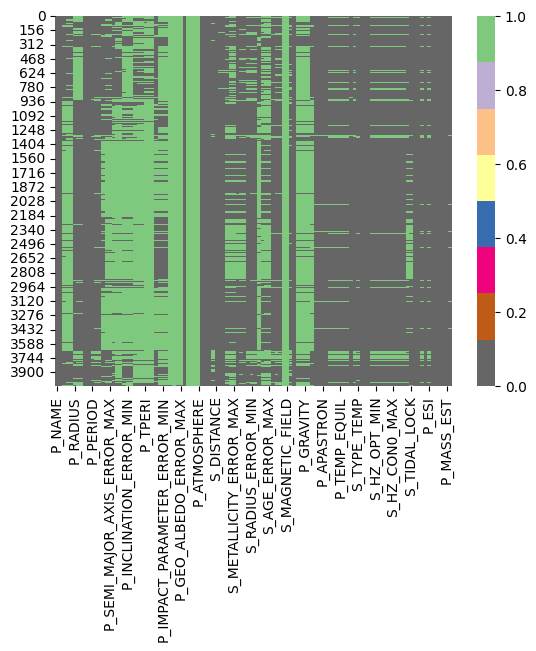

In [ ]:
#Visulazing dataset
sns.heatmap(dataset.isnull(),cmap='Accent_r')

In [ ]:
# Removing attributes with more than 40% missing data
count = dataset.isnull().sum().sort_values(ascending=False)
percent = ((dataset.isnull().sum()/dataset.isnull().count())*100).sort_values(ascending=False)
missing = pd.concat([count,percent],axis=1,keys=['count','%'])
missing = missing[lambda x :missing['%']>60]
missing.head(60)

,count,%
P_DETECTION_MASS,4048,100.000000
P_GEO_ALBEDO,4048,100.000000
S_MAGNETIC_FIELD,4048,100.000000
S_DISC,4048,100.000000
P_ATMOSPHERE,4048,100.000000
P_ALT_NAMES,4048,100.000000
P_DETECTION_RADIUS,4048,100.000000
P_GEO_ALBEDO_ERROR_MIN,4043,99.876482
P_TEMP_MEASURED,4043,99.876482
P_GEO_ALBEDO_ERROR_MAX,4043,99.876482


In [ ]:
dataset_cols_dropped = dataset.drop(['P_DETECTION_MASS', 'P_GEO_ALBEDO',
'S_MAGNETIC_FIELD', 'S_DISC', 'P_ATMOSPHERE', 'P_ALT_NAMES',
'P_DETECTION_RADIUS', 'P_GEO_ALBEDO_ERROR_MIN', 'P_TEMP_MEASURED',
'P_GEO_ALBEDO_ERROR_MAX', 'P_TPERI_ERROR_MAX', 'P_TPERI_ERROR_MIN',
'P_TPERI', 'P_OMEGA_ERROR_MIN', 'P_OMEGA_ERROR_MAX', 'P_DENSITY',
'P_ESCAPE', 'P_POTENTIAL', 'P_GRAVITY', 'P_OMEGA',
'P_INCLINATION_ERROR_MAX', 'P_INCLINATION_ERROR_MIN', 'P_INCLINATION',
'P_ECCENTRICITY_ERROR_MAX', 'P_ECCENTRICITY_ERROR_MIN', 'S_TYPE',
'P_ECCENTRICITY','P_IMPACT_PARAMETER_ERROR_MIN',
'P_IMPACT_PARAMETER_ERROR_MAX', 'P_IMPACT_PARAMETER', 'P_MASS_ERROR_MAX','P_MASS_ERROR_MIN', 'P_HILL_SPHERE', 'P_SEMI_MAJOR_AXIS_ERROR_MIN',\
'P_SEMI_MAJOR_AXIS_ERROR_MAX', 'P_MASS', 'S_AGE_ERROR_MAX',
'S_AGE_ERROR_MIN', 'S_AGE', 'P_ANGULAR_DISTANCE', 'P_SEMI_MAJOR_AXIS'],

axis = 1)
dataset_cols_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4048 entries, 0 to 4047
Data columns (total 71 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   P_NAME                   4048 non-null   object 
 1   P_STATUS                 4048 non-null   float64
 2   P_RADIUS                 3139 non-null   float64
 3   P_RADIUS_ERROR_MIN       3105 non-null   float64
 4   P_RADIUS_ERROR_MAX       3105 non-null   float64
 5   P_YEAR                   4048 non-null   int64  
 6   P_UPDATED                4048 non-null   object 
 7   P_PERIOD                 3938 non-null   float64
 8   P_PERIOD_ERROR_MIN       3807 non-null   float64
 9   P_PERIOD_ERROR_MAX       3807 non-null   float64
 10  P_DETECTION              4048 non-null   object 
 11  S_NAME                   4048 non-null   object 
 12  S_RA                     4048 non-null   float64
 13  S_DEC                    4048 non-null   float64
 14  S_MAG                   

In [ ]:
dataset_cols_dropped.select_dtypes(include=['object']).columns
object_cols = dataset_cols_dropped.select_dtypes(include=['object'])
count = object_cols.isnull().sum().sort_values(ascending=False)
percent = ((object_cols.isnull().sum()/object_cols.isnull().count())*100).sort_values(ascending=False)
missing = pd.concat([count,percent],axis=1,keys=['Count','%'])
missing.head(13)

,Count,%
P_TYPE_TEMP,327,8.078063
S_TYPE_TEMP,136,3.359684
P_TYPE,17,0.419960
P_NAME,0,0.000000
P_UPDATED,0,0.000000
P_DETECTION,0,0.000000
S_NAME,0,0.000000
S_ALT_NAMES,0,0.000000
S_RA_T,0,0.000000
S_DEC_T,0,0.000000


In [ ]:
dataset_cols_dropped['P_TYPE_TEMP'] = dataset_cols_dropped['P_TYPE_TEMP'].fillna(dataset_cols_dropped['P_TYPE_TEMP'].mode()[0])
dataset_cols_dropped['S_TYPE_TEMP'] = dataset_cols_dropped['S_TYPE_TEMP'].fillna(dataset_cols_dropped['S_TYPE_TEMP'].mode()[0])
dataset_cols_dropped['P_TYPE'] = dataset_cols_dropped['P_TYPE'].fillna(dataset_cols_dropped['P_TYPE'].mode()[0])

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoders = {}
for col in dataset_cols_dropped.select_dtypes(include = ['object']).columns:
  encoders[col] = LabelEncoder()
  dataset_cols_dropped[col] = encoders[col].fit_transform(dataset_cols_dropped[col])

In [ ]:
from sklearn.experimental import enable_iterative_imputer

In [ ]:
from sklearn.impute import IterativeImputer
imputed_data = dataset_cols_dropped.copy(deep=True)
mice_imputer = IterativeImputer()
imputed_data.iloc[:, :] = mice_imputer.fit_transform(dataset_cols_dropped)
imputed_data.head(6)

<ipython-input-18-860849f9ace6>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  imputed_data.iloc[:, :] = mice_imputer.fit_transform(dataset_cols_dropped)


,P_NAME,P_STATUS,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,P_PERIOD,P_PERIOD_ERROR_MIN,P_PERIOD_ERROR_MAX,...,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,0.0,3.0,4.798394,8.416078,-2.41231,2007.0,0.0,326.03000,-0.32,0.32,...,0.0,1.0,0.0,0.083813,24.0,24.0,5.0,12.082709,6165.86330,1.29
1,1.0,3.0,4.798394,8.416078,-2.41231,2009.0,146.0,516.21997,-3.20,3.20,...,0.0,1.0,0.0,0.082414,83.0,83.0,42.0,12.229641,4684.78480,1.53
2,2.0,3.0,4.798394,8.416078,-2.41231,2008.0,0.0,185.84000,-0.23,0.23,...,0.0,1.0,0.0,0.081917,0.0,0.0,2.0,12.848516,1525.57440,0.83
3,3.0,3.0,4.798394,8.416078,-2.41231,2002.0,146.0,1773.40000,-2.50,2.50,...,0.0,0.0,0.0,0.145241,39.0,39.0,34.0,12.865261,1481.07850,2.93
4,4.0,3.0,4.798394,8.416078,-2.41231,1996.0,146.0,798.50000,-1.00,1.00,...,1.0,2.0,0.0,0.368627,30.0,30.0,75.0,13.421749,565.73385,1.66
5,5.0,3.0,4.798394,8.416078,-2.41231,2008.0,0.0,993.30000,-3.20,3.20,...,0.0,1.0,0.0,0.216174,31.0,31.0,22.0,12.424038,3273.62840,2.60


In [ ]:
imputed_data.isna().sum(axis=0)

P_NAME                   0
P_STATUS                 0
P_RADIUS                 0
P_RADIUS_ERROR_MIN       0
P_RADIUS_ERROR_MAX       0
                        ..
S_CONSTELLATION_ABR      0
S_CONSTELLATION_ENG      0
P_RADIUS_EST             0
P_MASS_EST               0
P_SEMI_MAJOR_AXIS_EST    0
Length: 71, dtype: int64

In [ ]:
from collections import Counter
counter_ = Counter(imputed_data['P_HABITABLE'])
for class_label_, example_num_ in counter_.items():
  percentage_ = example_num_ / len(imputed_data['P_HABITABLE'])*100
  print('class=%d, n=%d (%.3f%%)' % (class_label_, example_num_, percentage_))

class=0, n=3993 (98.641%)
class=2, n=34 (0.840%)
class=1, n=21 (0.519%)


In [ ]:
from imblearn.combine import SMOTEENN
X, y = imputed_data.drop(['P_HABITABLE'], axis = 1), imputed_data.P_HABITABLE
smt = SMOTEENN(random_state=0)
X, y = smt.fit_resample(X,y)

from collections import Counter
counter = Counter(y)
for class_label, example_num in counter.items():
  percentage = example_num / len(y)*100
  print('Class=%d, n =%d (%.3f%%)' % (class_label, example_num, percentage))

Class=0, n =3843 (32.925%)
Class=1, n =3993 (34.210%)
Class=2, n =3836 (32.865%)


In [ ]:
sampled_data = X
sampled_data['P_HABITABLE'] = y
sampled_data.shape
correlation_mat = sampled_data.corr().abs()

<Axes: >

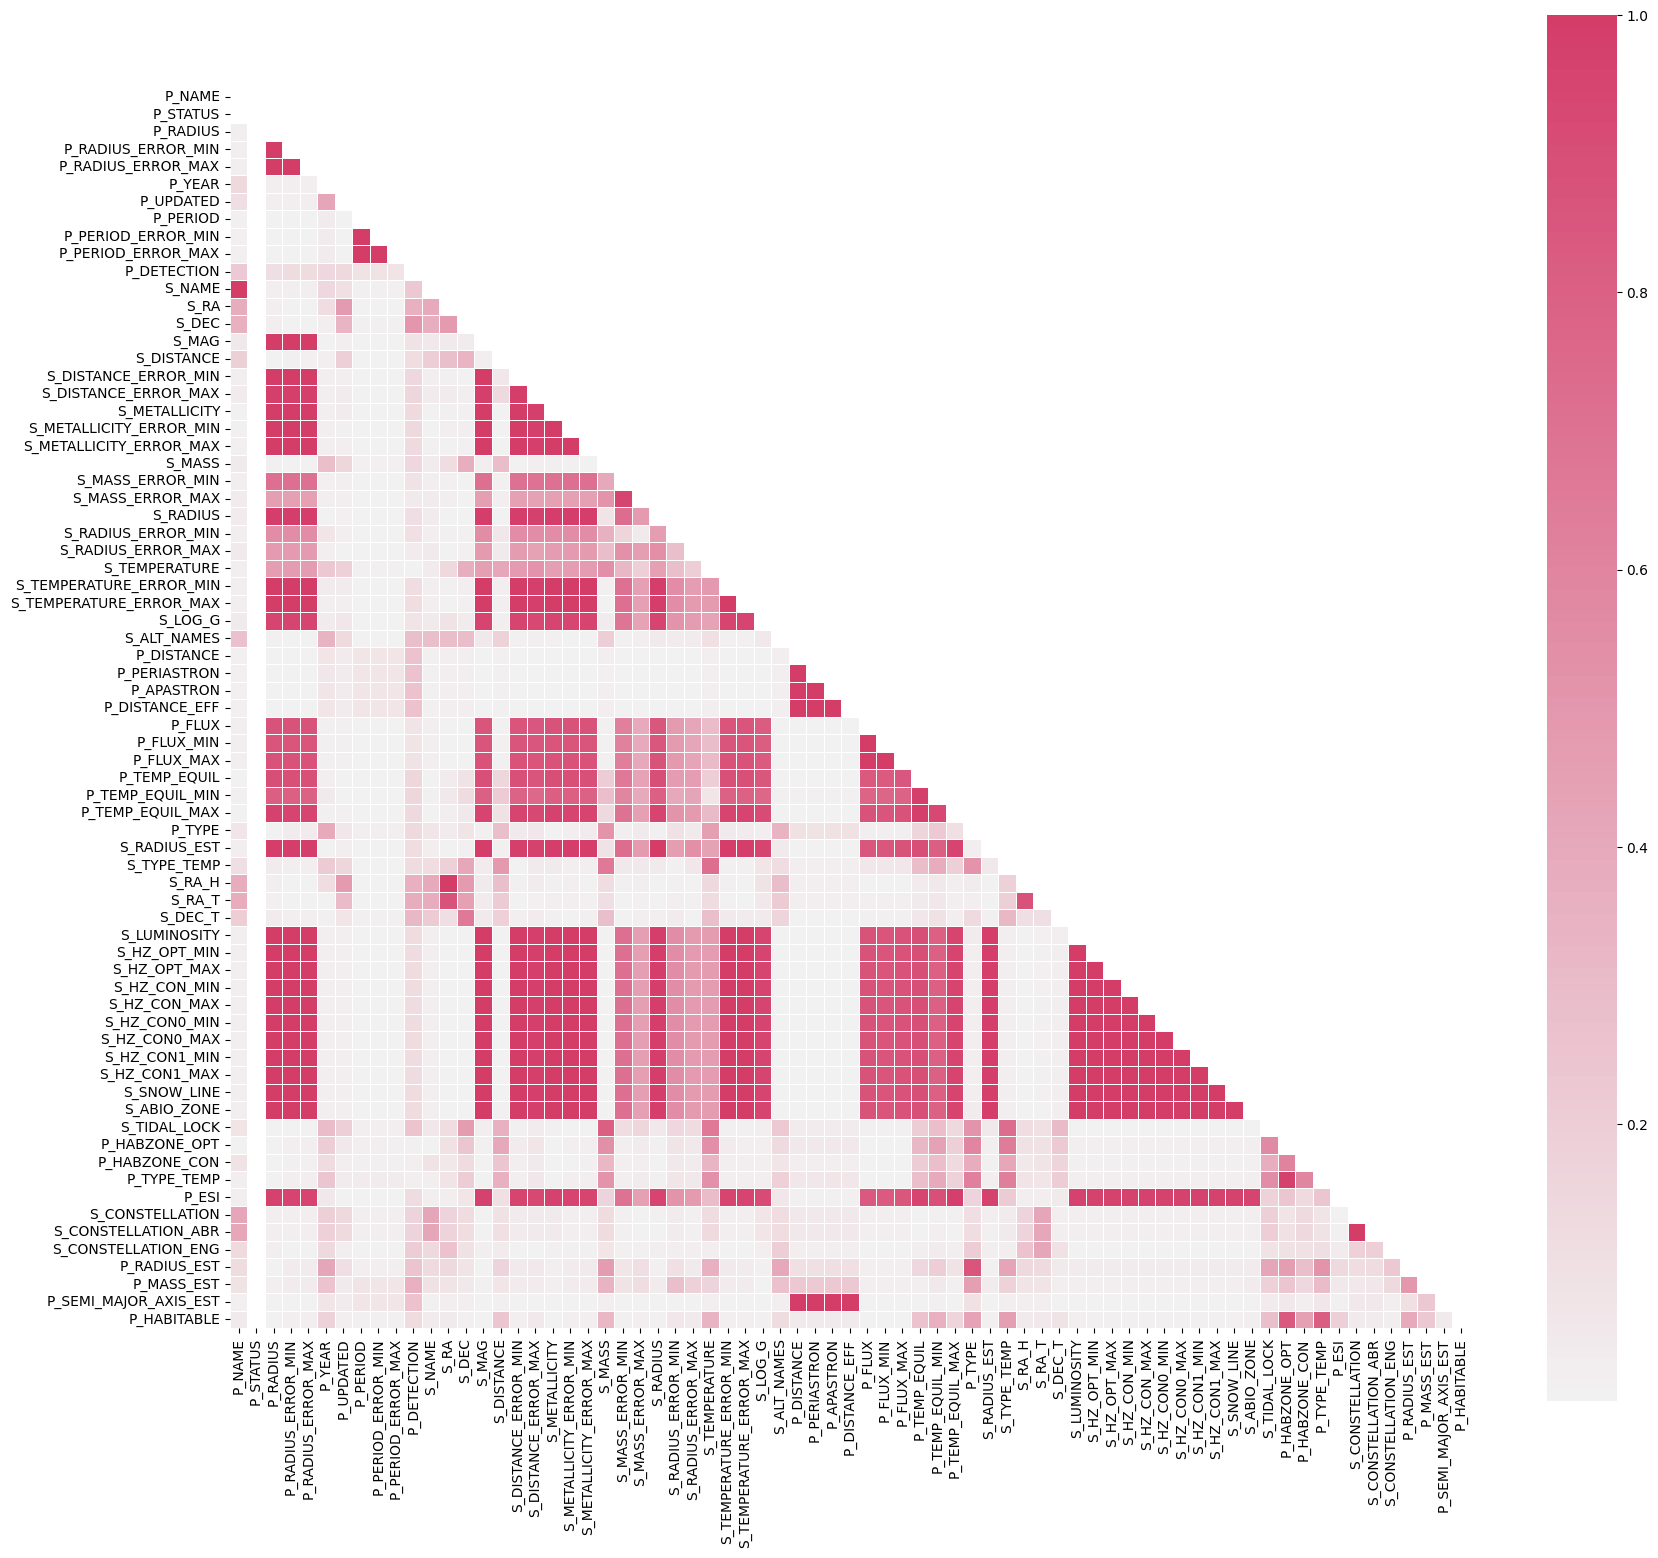

In [ ]:
import matplotlib.pyplot as plt
mask = np.triu(np.ones_like(correlation_mat, dtype = np.bool_))
f, ax = plt.subplots(figsize=(20,20))
cmap = sns.diverging_palette(255, 0 , as_cmap = True)
sns.heatmap(correlation_mat, mask = mask, cmap = cmap, vmax = None, center = 0, square = True, annot = False, linewidths = .5, cbar_kws = {"shrink":0.9})

In [ ]:
upper_triangle = correlation_mat.where(np.triu(np.ones(correlation_mat.shape),k=1).astype(np.bool_))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column]>.95)]
print(to_drop)
np.size(to_drop)

['P_RADIUS_ERROR_MIN', 'P_RADIUS_ERROR_MAX', 'P_PERIOD_ERROR_MIN', 'P_PERIOD_ERROR_MAX', 'S_NAME', 'S_MAG', 'S_DISTANCE_ERROR_MIN', 'S_DISTANCE_ERROR_MAX', 'S_METALLICITY', 'S_METALLICITY_ERROR_MIN', 'S_METALLICITY_ERROR_MAX', 'S_RADIUS', 'S_TEMPERATURE_ERROR_MIN', 'S_TEMPERATURE_ERROR_MAX', 'S_LOG_G', 'P_PERIASTRON', 'P_APASTRON', 'P_DISTANCE_EFF', 'P_FLUX_MIN', 'P_FLUX_MAX', 'P_TEMP_EQUIL_MIN', 'P_TEMP_EQUIL_MAX', 'S_RADIUS_EST', 'S_RA_H', 'S_LUMINOSITY', 'S_HZ_OPT_MIN', 'S_HZ_OPT_MAX', 'S_HZ_CON_MIN', 'S_HZ_CON_MAX', 'S_HZ_CON0_MIN', 'S_HZ_CON0_MAX', 'S_HZ_CON1_MIN', 'S_HZ_CON1_MAX', 'S_SNOW_LINE', 'S_ABIO_ZONE', 'P_TYPE_TEMP', 'P_ESI', 'S_CONSTELLATION_ABR', 'P_SEMI_MAJOR_AXIS_EST']


39

In [ ]:
preprocessed_data = sampled_data.drop(['P_RADIUS_ERROR_MIN', 'P_RADIUS_ERROR_MAX', 'P_PERIOD_ERROR_MIN', 'P_PERIOD_ERROR_MAX', 'S_NAME', 'S_MAG', 'S_DISTANCE_ERROR_MIN', 'S_DISTANCE_ERROR_MAX', 'S_METALLICITY', 'S_METALLICITY_ERROR_MIN', 'S_METALLICITY_ERROR_MAX', 'S_RADIUS', 'S_TEMPERATURE_ERROR_MIN', 'S_TEMPERATURE_ERROR_MAX', 'S_LOG_G', 'P_PERIASTRON', 'P_APASTRON', 'P_DISTANCE_EFF', 'P_FLUX_MIN', 'P_FLUX_MAX', 'P_TEMP_EQUIL_MIN', 'P_TEMP_EQUIL_MAX', 'S_RADIUS_EST', 'S_RA_H', 'S_LUMINOSITY', 'S_HZ_OPT_MIN', 'S_HZ_OPT_MAX', 'S_HZ_CON_MIN', 'S_HZ_CON_MAX', 'S_HZ_CON0_MIN', 'S_HZ_CON0_MAX', 'S_HZ_CON1_MIN', 'S_HZ_CON1_MAX', 'S_SNOW_LINE', 'S_ABIO_ZONE', 'P_ESI', 'S_CONSTELLATION_ABR', 'P_SEMI_MAJOR_AXIS_EST']
, axis = 1)
preprocessed_data.head(10)
preprocessed_data.columns.values.tolist()

['P_NAME',
 'P_STATUS',
 'P_RADIUS',
 'P_YEAR',
 'P_UPDATED',
 'P_PERIOD',
 'P_DETECTION',
 'S_RA',
 'S_DEC',
 'S_DISTANCE',
 'S_MASS',
 'S_MASS_ERROR_MIN',
 'S_MASS_ERROR_MAX',
 'S_RADIUS_ERROR_MIN',
 'S_RADIUS_ERROR_MAX',
 'S_TEMPERATURE',
 'S_ALT_NAMES',
 'P_DISTANCE',
 'P_FLUX',
 'P_TEMP_EQUIL',
 'P_TYPE',
 'S_TYPE_TEMP',
 'S_RA_T',
 'S_DEC_T',
 'S_TIDAL_LOCK',
 'P_HABZONE_OPT',
 'P_HABZONE_CON',
 'P_TYPE_TEMP',
 'S_CONSTELLATION',
 'S_CONSTELLATION_ENG',
 'P_RADIUS_EST',
 'P_MASS_EST',
 'P_HABITABLE']

In [ ]:
# relavance as per physics
# preprocessed_data.drop(['P_NAME',
#  'P_STATUS',

#  'P_YEAR',
#  'P_UPDATED',

#  'P_DETECTION',
#  'S_RA',
#  'S_DEC',

#  'S_MASS_ERROR_MIN',
#  'S_RADIUS_ERROR_MIN',
#  'S_RADIUS_ERROR_MAX',

#  'S_ALT_NAMES',

#  'P_FLUX',

#  'S_TYPE_TEMP',
#  'S_RA_T',
#  'S_DEC_T',

#  'P_HABZONE_OPT',
#  'P_HABZONE_CON',
#  'S_CONSTELLATION',
#  'S_CONSTELLATION_ENG',
#  'P_RADIUS_EST',

#  'P_HABITABLE'], axis = 1)

In [ ]:
feature_mat = preprocessed_data.drop('P_HABITABLE', axis = 1)
target = preprocessed_data['P_HABITABLE']

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

estimator = rf(n_estimators = 1000, random_state = 0 )
selector = SelectFromModel(estimator)
selector.fit(feature_mat, target)

status = selector.get_support()
print("Status: ", status)

features = feature_mat.loc[:, status].columns.tolist()
print(features)

print(rf(n_estimators = 1000, random_state = 0).fit(feature_mat, target).feature_importances_)
# [['P_PERIOD', 'P_FLUX', 'P_TEMP_EQUIL','P_TYPE', 'P_HABZONE_OPT','P_RADIUS_EST', 'P_MASS_EST', 'S_TYPE_TEMP']]

Status:  [False False False False False False False False False False  True False
 False False False  True False False  True  True  True False False False
 False  True False  True False False  True  True]
['S_MASS', 'S_TEMPERATURE', 'P_FLUX', 'P_TEMP_EQUIL', 'P_TYPE', 'P_HABZONE_OPT', 'P_TYPE_TEMP', 'P_RADIUS_EST', 'P_MASS_EST']
[0.01033567 0.         0.01159673 0.00185839 0.00086448 0.02441622
 0.00557415 0.00174861 0.00481235 0.02818134 0.03797434 0.00540731
 0.01228869 0.00462998 0.00367171 0.04640438 0.00108808 0.01860943
 0.0944997  0.08509184 0.13512839 0.01372885 0.0017248  0.00195428
 0.02585365 0.10884807 0.01923766 0.11520237 0.00480945 0.00122032
 0.08308562 0.09015315]


In [ ]:
from sklearn.ensemble import AdaBoostRegressor as Ada

estimator = Ada(random_state = 0, n_estimators = 50)
selector = SelectFromModel(estimator)
selector.fit(feature_mat, target)

status = selector.get_support()
print("Status: ", status)

featuers = feature_mat.loc[:, status].columns.tolist()
print(features)

print(estimator.fit(feature_mat, target).feature_importances_)

Status:  [False False False False False False False False False False False False
 False False False False False False  True  True  True False False False
 False  True False  True False False False False]
['S_MASS', 'S_TEMPERATURE', 'P_FLUX', 'P_TEMP_EQUIL', 'P_TYPE', 'P_HABZONE_OPT', 'P_TYPE_TEMP', 'P_RADIUS_EST', 'P_MASS_EST']
[7.31564857e-03 0.00000000e+00 0.00000000e+00 9.95883621e-06
 0.00000000e+00 1.83416234e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.31825078e-02 2.13257716e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.84694151e-03
 0.00000000e+00 3.41683622e-04 1.10737903e-01 7.24356196e-02
 5.36724709e-01 1.64199403e-02 0.00000000e+00 5.02697509e-06
 1.06227577e-02 9.04433174e-02 0.00000000e+00 4.35102085e-02
 0.00000000e+00 0.00000000e+00 2.13041709e-02 2.44322107e-02]


In [ ]:
del features
del estimator
del selector
del status


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier as et

estimator = et(n_estimators = 1000, random_state = 0)
selector = SelectFromModel(estimator)
selector.fit(feature_mat, target)

status = selector.get_support()
print("Status: ", status)

features = feature_mat.loc[:, status].columns.tolist()
print(features)

print(estimator.fit(feature_mat, target).feature_importances_)

Status:  [False False False False False False False False False False False False
 False False False False False False False False  True False False False
  True  True  True  True False False  True False]
['P_TYPE', 'S_TIDAL_LOCK', 'P_HABZONE_OPT', 'P_HABZONE_CON', 'P_TYPE_TEMP', 'P_RADIUS_EST']
[0.02679617 0.         0.01811141 0.00495867 0.00737684 0.00736513
 0.02470423 0.01185601 0.02109899 0.01881377 0.0279004  0.00569979
 0.00655152 0.00706727 0.0059345  0.02366694 0.00838082 0.00825299
 0.01503363 0.02572956 0.15123441 0.02958057 0.01068902 0.01043577
 0.04200899 0.21331724 0.04674695 0.12254958 0.01541644 0.00998797
 0.04460189 0.02813254]


In [ ]:
del feature_mat
del target
del X
del y

In [ ]:
from sklearn.model_selection import train_test_split

feature_mat = preprocessed_data[['P_PERIOD', 'P_FLUX', 'P_TEMP_EQUIL',
'P_TYPE', 'P_HABZONE_OPT','P_RADIUS_EST', 'P_MASS_EST', 'S_TYPE_TEMP']]

target = preprocessed_data['P_HABITABLE']

X_train, X_test, y_train, y_test = train_test_split(feature_mat, target,
test_size = 0.33, random_state = 42)

print(f"X_train dimentions: {X_train.shape}")
print(f"X_test dimentions: {X_test.shape}")
print(f"y_train dimentions: {y_train.shape}")
print(f"y_test dimentions: {y_test.shape}")

feature_mat.info()

X_train dimentions: (7820, 8)
X_test dimentions: (3852, 8)
y_train dimentions: (7820,)
y_test dimentions: (3852,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11672 entries, 0 to 11671
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   P_PERIOD       11672 non-null  float64
 1   P_FLUX         11672 non-null  float64
 2   P_TEMP_EQUIL   11672 non-null  float64
 3   P_TYPE         11672 non-null  float64
 4   P_HABZONE_OPT  11672 non-null  float64
 5   P_RADIUS_EST   11672 non-null  float64
 6   P_MASS_EST     11672 non-null  float64
 7   S_TYPE_TEMP    11672 non-null  float64
dtypes: float64(8)
memory usage: 729.6 KB


In [ ]:
y = np.array(X_test)


[[3.22964000e-01 1.58886886e+02 7.73292656e+02 ... 1.39063720e+01
  2.52641480e+02 3.00000000e+00]
 [5.40604250e+00 9.70444350e+02 1.42196060e+03 ... 1.28130300e+01
  7.91391730e+02 2.00000000e+00]
 [1.24932710e+01 6.14678402e-01 2.24325659e+02 ... 1.16931658e+00
  1.70394204e+00 5.00000000e+00]
 ...
 [3.31186440e+00 3.63420630e+02 1.11236500e+03 ... 9.97690000e+00
  3.27362840e+02 3.00000000e+00]
 [3.00627100e+01 1.41442947e+00 2.77824408e+02 ... 1.82872912e+00
  4.01032323e+00 5.00000000e+00]
 [1.24536000e+03 1.34234410e-01 1.52652450e+02 ... 1.30986390e+01
  9.84313330e+02 3.00000000e+00]]


In [ ]:
y[0]

array([3.22964000e-01, 1.58886886e+02, 7.73292656e+02, 0.00000000e+00,
       0.00000000e+00, 1.39063720e+01, 2.52641480e+02, 3.00000000e+00])

In [ ]:
 k = modelS.transform(y[0].reshape(1,8))

In [ ]:
k

array([[1.49658448e-06, 7.02090036e-01, 9.13896184e-01, 0.00000000e+00,
        0.00000000e+00, 4.13510913e-01, 1.42993342e-02, 5.00000000e-01]])

In [ ]:
y_test.head(10)

1118     0.0
10267    2.0
4261     1.0
3087     0.0
1342     0.0
4546     1.0
463      0.0
7986     2.0
4680     1.0
3450     0.0
Name: P_HABITABLE, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
modelS = scaler.fit(X_train)
X_train = modelS.transform(X_train)
modelS2 = scaler.fit(X_test)
X_test = modelS2.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': np.arange(2, 10, 1),
              'max_leaf_nodes': np.arange(2, 100, 10),
              'random_state': [0, 1, 2, 3, 4, 5],
              'splitter': ['best', 'random']}

grid_search = GridSearchCV(DecisionTreeClassifier(),
                           param_grid = param_grid,
                           refit = True, verbose = 0)

grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'max_depth': 6, 'max_leaf_nodes': 12, 'random_state': 0, 'splitter': 'random'}


In [ ]:
from sklearn.metrics import confusion_matrix
def plot_confusion_mat(ytest, ypred):
  conf_mat=confusion_matrix(ytest, ypred)
  confusion_mat_df = pd.DataFrame(conf_mat,index=['Inhabitable', 'Consevatively Habitable','Optimistically Habitable'],
                         columns = ['Inhabitable', 'Consevatively Habitable','Optimistically Habitable'])
  plt.figure(figsize = (5,4))
  sns.heatmap(confusion_mat_df, annot = True)
  plt.title('Habitability Confusion Matrix')
  plt.ylabel('Actal Values')
  plt.xlabel('Predicted Values')
  plt.show()

  return conf_mat

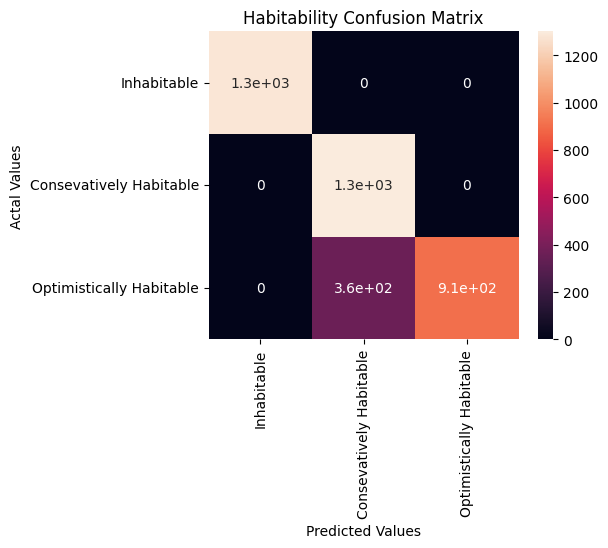

Decision Tree classification Report:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1284
         1.0       0.78      1.00      0.88      1301
         2.0       1.00      0.72      0.83      1267

    accuracy                           0.91      3852
   macro avg       0.93      0.91      0.90      3852
weighted avg       0.93      0.91      0.90      3852



In [ ]:
import time
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

t0 = time.time()

dtree_model = DecisionTreeClassifier(splitter = 'random',
                                     max_depth = 6,
                                     random_state = 0,
                                     max_leaf_nodes = 12).fit(X_train, y_train)


dtree_predictions = dtree_model.predict(X_test)

dtree_time = time.time() - t0

dtree_accuracy = accuracy_score(y_test, dtree_predictions)

confusion_mat = plot_confusion_mat(y_test, dtree_predictions)


print(f"Decision Tree classification Report:\n")
print(classification_report(y_test, dtree_predictions))

del confusion_mat
del t0

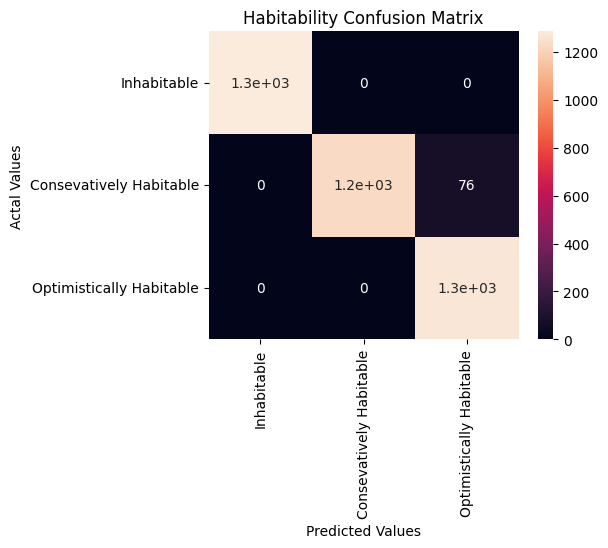

KNN classification Report:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1284
         1.0       1.00      0.94      0.97      1301
         2.0       0.94      1.00      0.97      1267

    accuracy                           0.98      3852
   macro avg       0.98      0.98      0.98      3852
weighted avg       0.98      0.98      0.98      3852



In [ ]:
from sklearn.neighbors import KNeighborsClassifier


t0 = time.time()

knn_model = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train)


knn_predictions = knn_model.predict(X_test)

knn_time = time.time() - t0

knn_accuracy = accuracy_score(y_test, knn_predictions)

confusion_mat = plot_confusion_mat(y_test, knn_predictions)

print(f"KNN classification Report:\n")
print(classification_report(y_test, knn_predictions))

del confusion_mat
del t0

In [ ]:
import warnings
warnings.simplefilter('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

param_grid = {'criterion': ['friedman_mse',  'mse'],
              'n_estimators': np.arange(10, 100, 10)}

grid_search = GridSearchCV(GradientBoostingClassifier(),
                           param_grid = param_grid,
                           refit = True, verbose = 1)

grid_search.fit(X_train, y_train)

# print best parameter after tuning
print(f"Best Parameters: {grid_search.best_params_}")

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'criterion': 'friedman_mse', 'n_estimators': 10}


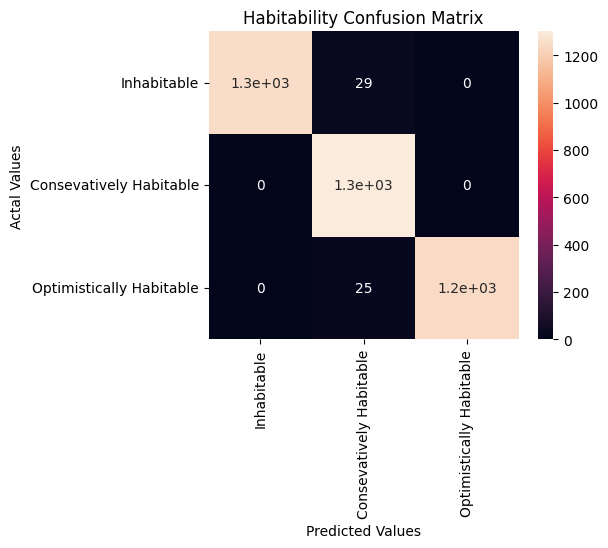

Gradient Boosting classification Report:

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      1284
         1.0       0.96      1.00      0.98      1301
         2.0       1.00      0.98      0.99      1267

    accuracy                           0.99      3852
   macro avg       0.99      0.99      0.99      3852
weighted avg       0.99      0.99      0.99      3852



In [ ]:
from sklearn.metrics import classification_report

t0 = time.time()

gb_model = GradientBoostingClassifier(loss = 'deviance', n_estimators = 10,
                                criterion = 'friedman_mse', max_depth = 6,
                                random_state = 0, max_features = 'auto',
                                max_leaf_nodes = 12).fit(X_train, y_train)

#Test the model
gb_predictions = gb_model.predict(X_test)

#Calculate the time taken for further comparison
gb_time = time.time() - t0

#Store accuracy and elapsed time for final model comparison
gb_accuracy = accuracy_score(y_test, gb_predictions)


confusion_mat = plot_confusion_mat(y_test, gb_predictions)


print(f"Gradient Boosting classification Report:\n")
print(classification_report(y_test, gb_predictions))

del confusion_mat

In [ ]:
def plot_model_log(log):

    fig, ax1 = plt.subplots(figsize = (10, 5))
    ax1.set_title('Accuracy and Time taken', fontsize = 13)
    color = 'tab:green'
    ax1.set_xlabel('Classifier', fontsize = 13)
    ax1.set_ylabel('Time taken', fontsize = 13, color = color)
    ax2 = sns.barplot(x = 'Classifier', y = 'Time taken', data = log, palette = 'summer')
    ax1.tick_params(axis = 'y')
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Accuracy', fontsize = 13, color = color)
    ax2 = sns.lineplot(x = 'Classifier', y = 'Accuracy', data = log, sort = False, color = color)
    ax2.tick_params(axis = 'y', color = color)

          Classifier  Accuracy  Time taken
0      Decision Tree  0.906802    0.005747
1                KNN  0.980270    0.343099
2  Gradient Boosting  0.985981    0.628586


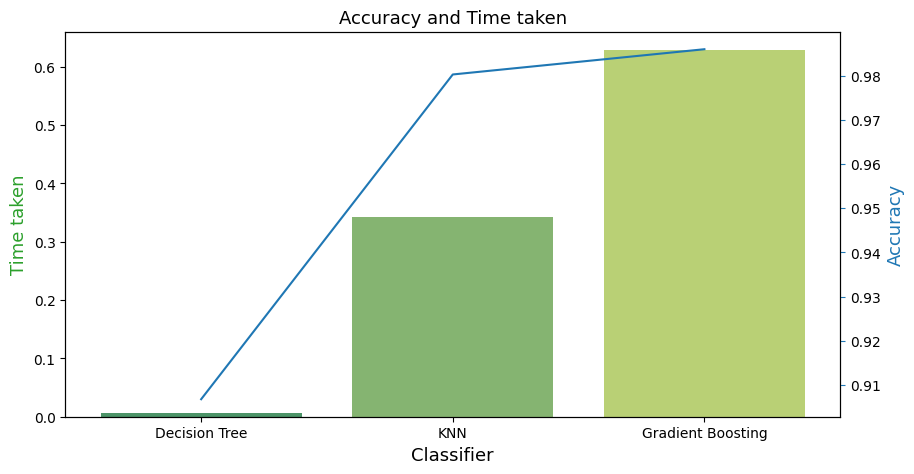

In [ ]:
accuracy_list = [dtree_accuracy, knn_accuracy, gb_accuracy]

#Make a list of times
time_list = [dtree_time, knn_time, gb_time]

log_data = {'Classifier': ['Decision Tree','KNN','Gradient Boosting'],
              'Accuracy': accuracy_list,
              'Time taken': time_list}
clf_log = pd.DataFrame(log_data)

#Plot the log
plot_model_log(clf_log)
print(clf_log)

In [ ]:
from joblib import dump, load
dump(modelS, open('modelS.joblib','wb'))
#clf2 = load(open('filename.joblib','rb'))

In [ ]:
import pickle
pickle.dump(modelS,open('modelS.pkl','wb'))

In [ ]:
X_test[4048]
X_test[6486 ]
X_test[6355]
X_test[10219]
X_test[6858]
X_test[8423]

IndexError: ignored

In [ ]:
y_test.head(10)

3595     0.0
3689     0.0
6486     1.0
6355     1.0
10219    2.0
2459     0.0
7108     1.0
101      0.0
10675    2.0
8054     2.0
Name: P_HABITABLE, dtype: float64

In [ ]:
imputed_data['S_TYPE_TEMP'].unique()

array([4., 3., 5., 2., 1., 0., 6.])

In [ ]:
dataset['S_TYPE_TEMP'].unique()

array(['K', 'G', 'M', nan, 'F', 'B', 'A', 'O'], dtype=object)

In [ ]:
d

In [ ]:
X_test[10]



array([1.71556662e-04, 7.02009030e-01, 9.12851459e-01, 8.00000000e-01,
       0.00000000e+00, 5.86666667e-02, 2.57601749e-04, 5.00000000e-01])

In [ ]:
x = 0
for y in y_test:
  x = x+1
  if (y ==2):
    print(X_test[x])

KeyError: ignored

In [ ]:
S = X_test
np.append(S, y_test, axis=1)

ValueError: ignored

In [ ]:
for x in preprocessed_data['P_PERIOD']:
    print(x)

Streaming output truncated to the last 5000 lines.
114.26878724764248
127.51132963115238
6.9859943487770035
10.962983626572179
17.352003034264442
52.709244527781415
5.02361214520351
35.579023605675296
46.946675016272835
112.63697061803862
129.22104546310297
95.03356480747522
9.071737306622095
119.56819774463797
4.6331971117825645
42.6069440558248
8.302341921648125
37.066072429642674
8.065777215245484
15.777043241262312
42.17596211978805
74.94499699232041
79.7870392692919
10.800175051609461
9.086759828680817
26.61187581581274
8.737803273975173
17.100325598597202
11.477182391272777
47.98669926902061
10.664677287204897
33.63309492172234
35.86128387880332
31.263513700148145
100.39723744773232
65.86088557596726
6.317178396036959
12.363606475906472
6.305626410099735
13.647714758110766
194.72102246733868
65.45842938791289
16.388916095351796
45.69322824320247
38.315773328510375
33.254606679632694
9.545912702480859
6.7160507446943765
8.661825732167308
8.407149571996483
239.52478455552267
11.125

SyntaxError: ignored